<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_8_3_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2장 코드

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

##패션 MNIST 데이터 불러오기
(train_input,train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1)/ 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

##합성곱 신경망 만들기
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1490/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7441 - loss: 0.7002

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7446 - loss: 0.6988 - val_accuracy: 0.8836 - val_loss: 0.3243
Epoch 2/20
1490/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8728 - loss: 0.3601

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8728 - loss: 0.3601 - val_accuracy: 0.8956 - val_loss: 0.2797
Epoch 3/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8933 - loss: 0.2951

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8933 - loss: 0.2951 - val_accuracy: 0.9056 - val_loss: 0.2535
Epoch 4/20
1486/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9052 - loss: 0.2599

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9052 - loss: 0.2599 - val_accuracy: 0.9086 - val_loss: 0.2484
Epoch 5/20
1490/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9133 - loss: 0.2409

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9132 - loss: 0.2409 - val_accuracy: 0.9161 - val_loss: 0.2302
Epoch 6/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9208 - loss: 0.2167

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9208 - loss: 0.2167 - val_accuracy: 0.9192 - val_loss: 0.2235
Epoch 7/20
1491/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9251 - loss: 0.2001

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9251 - loss: 0.2002 - val_accuracy: 0.9210 - val_loss: 0.2173
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9320 - loss: 0.1831 - val_accuracy: 0.9175 - val_loss: 0.2363
Epoch 9/20
1485/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9364 - loss: 0.1709

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9364 - loss: 0.1709 - val_accuracy: 0.9237 - val_loss: 0.2155
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9392 - loss: 0.1619 - val_accuracy: 0.9200 - val_loss: 0.2443
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9450 - loss: 0.1462 - val_accuracy: 0.9222 - val_loss: 0.2271


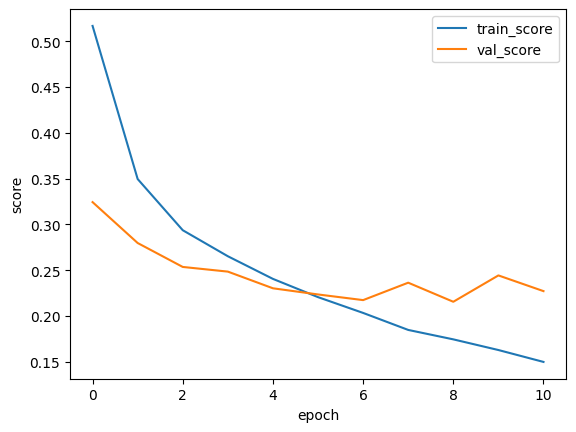

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['train_score','val_score'])

In [6]:
#validation
model.evaluate(val_scaled, val_target)

#하나만 예측해보기
preds = model.predict(val_scaled[0:1])
print(preds)

#test
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9260 - loss: 0.2093
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[5.7000313e-21 1.5612622e-32 1.9322062e-27 4.7848910e-24 9.6850711e-27
  5.0924851e-22 2.3577037e-24 9.8165877e-21 1.0000000e+00 1.2071553e-23]]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9117 - loss: 0.2475


[0.24111433327198029, 0.9132999777793884]

#3 시작

In [9]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [25]:
print("첫 번째 Conv2D의 가중치 개수 : ", len(model.layers[0].weights))
print(model.layers[0].weights)

첫 번째 Conv2D의 가중치 개수 :  2
[<Variable path=sequential/conv2d/kernel, shape=(3, 3, 1, 32), dtype=float32, value=[[[[-1.51590824e-01 -2.38276601e-01  2.35222101e-01  1.55228535e-02
    -5.25785685e-02 -2.30600476e-01  1.62749976e-01 -1.52378008e-01
    -2.60827124e-01  5.19526154e-02  1.22606412e-01  2.08351105e-01
     2.38377787e-02  1.29977375e-01 -9.91062000e-02  2.86606401e-02
    -1.08684003e-01  6.44988790e-02 -4.67184447e-02 -2.77188867e-01
     1.12915508e-01 -1.24727368e-01 -2.13331550e-01  2.45231703e-01
    -1.82747573e-01 -7.75228590e-02 -2.00542122e-01  2.09664941e-01
    -3.32334518e-01 -2.40086392e-02  2.05315933e-01 -1.68852794e+00]]

  [[-2.06189156e-01 -1.26895621e-01  3.16703647e-01 -1.63928568e-01
    -9.97564290e-03 -1.75875947e-02  1.79206833e-01  2.67893374e-01
    -8.68629757e-03  1.61755383e-01 -4.76084724e-02  2.62293845e-01
     7.44446591e-02 -1.01385944e-01  3.03042561e-01 -9.46252048e-02
     1.29189655e-01 -3.67558450e-02 -1.15205914e-01 -1.64599776e-01
    

In [26]:
print("첫 번째 가중치의 shape : ", model.layers[0].weights[0].shape)
print("두 번째 가중치의 shape : ", model.layers[0].weights[1].shape)

첫 번째 가중치의 shape :  (3, 3, 1, 32)
두 번째 가중치의 shape :  (32,)


In [27]:
conv_weights = model.layers[0].weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.02279224 0.2750822


(array([  3.,   0.,   1.,   1.,   0.,   2.,  47.,  94., 106.,  34.]),
 array([-1.7906872 , -1.56403494, -1.33738267, -1.11073041, -0.88407815,
        -0.65742588, -0.43077359, -0.20412131,  0.02253096,  0.24918324,
         0.4758355 ]),
 <BarContainer object of 10 artists>)

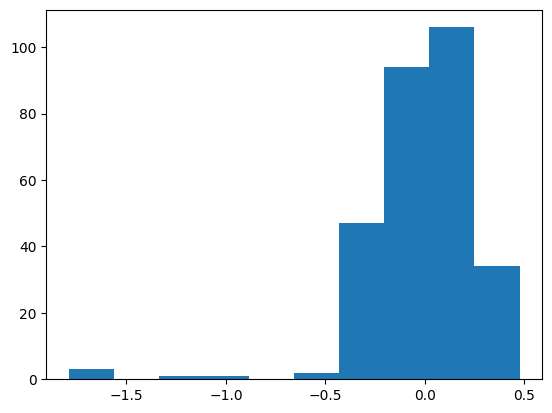

In [35]:
import matplotlib.pyplot as plt
plt.hist(model.layers[0].weights[0].numpy().reshape(-1,1))